In [ ]:
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0 

In [ ]:
print(len(x_train)) #training data 總共有60000張圖片
print(x_train[0].shape) 

60000
(28, 28)


label=5
label=0
label=4
label=1
label=9


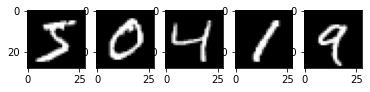

In [ ]:
import matplotlib.pyplot as plt
from pylab import *

for i in range(5):
 ax=plt.subplot(1,5,1+i)
 ax=imshow(x_train[i], cmap='gray')
 print('label='+str(y_train[i])) #無法使用set_title
plt.show()

In [ ]:
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential
input_shape = (28, 28, 1)
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape)) #圖片沒超過128*128 kernel size(長寬)為奇數<=3
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.compile(optimizer='adam', #訓練時用的優化方法，adam最快收斂提高準確度
              loss='sparse_categorical_crossentropy', #用來計算模型在訓練中要減少的量(模型權重的斜率)，loss函式有很多類別，此類別用於multi-classification，2個以上分類且label為int
              metrics=['accuracy'])  #成效衡量指標
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 28)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 4732)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               605824    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                      

In [ ]:
m=model.fit(x_train, y_train, epochs=5, batch_size=50)      # 將搭好的 model 去 fit 我們的 training data
model.evaluate(x_test, y_test, verbose=2) 

Epoch 1/5
1200/1200 [==============================] - 31s 26ms/step - loss: 0.2185 - accuracy: 0.9340
Epoch 2/5
1200/1200 [==============================] - 31s 26ms/step - loss: 0.0869 - accuracy: 0.9735
Epoch 3/5
1200/1200 [==============================] - 31s 26ms/step - loss: 0.0601 - accuracy: 0.9811
Epoch 4/5
1200/1200 [==============================] - 30s 25ms/step - loss: 0.0472 - accuracy: 0.9847
Epoch 5/5
1200/1200 [==============================] - 30s 25ms/step - loss: 0.0360 - accuracy: 0.9878
313/313 - 2s - loss: 0.0468 - accuracy: 0.9851 - 2s/epoch - 7ms/step


[0.04678872600197792, 0.9850999712944031]